In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

Количественные

непрерывные
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах

дискретные
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах

Категориальные
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником Work_accident
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

##Задание 1:

Загрузите файл HR.csv в pandas dataframe

In [98]:
url = "https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing"
path = "https://drive.google.com/uc?id=" + url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [99]:
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##Задание 2:

Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [101]:
#датафрейм из столбцов с количественными данными
df_quant = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']]
df_quant.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [102]:
df_quant.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_monthly_hours    200.00
time_spend_company         3.00
dtype: float64

In [103]:
#категориальные величины
for column_name in df.columns[-5:]:
  print('Уникальные значения для', column_name, df[column_name].unique())

Уникальные значения для Work_accident [0 1]
Уникальные значения для left [1 0]
Уникальные значения для promotion_last_5years [0 1]
Уникальные значения для department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Уникальные значения для salary ['low' 'medium' 'high']


In [104]:
df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


##Задание 3:

Рассчитать и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [105]:
#корреляция между количественными данными
df_quant.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

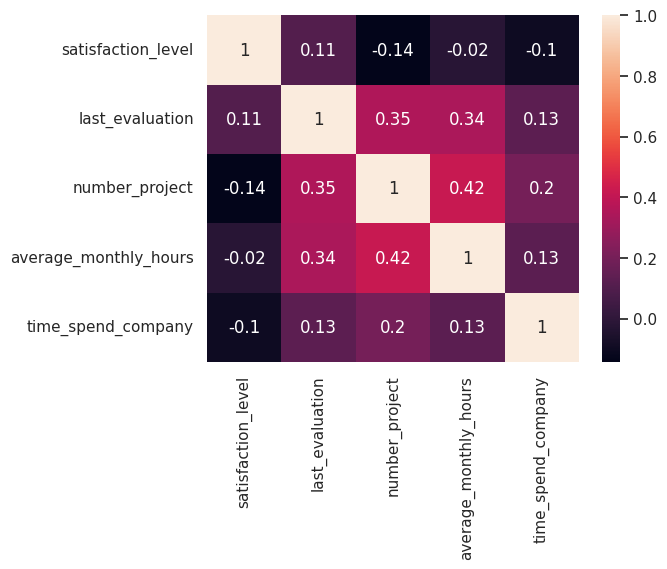

In [106]:
sns.set(rc={'figure.figsize':(6,4.5)})
sns.heatmap(df_quant.corr(), annot=True)

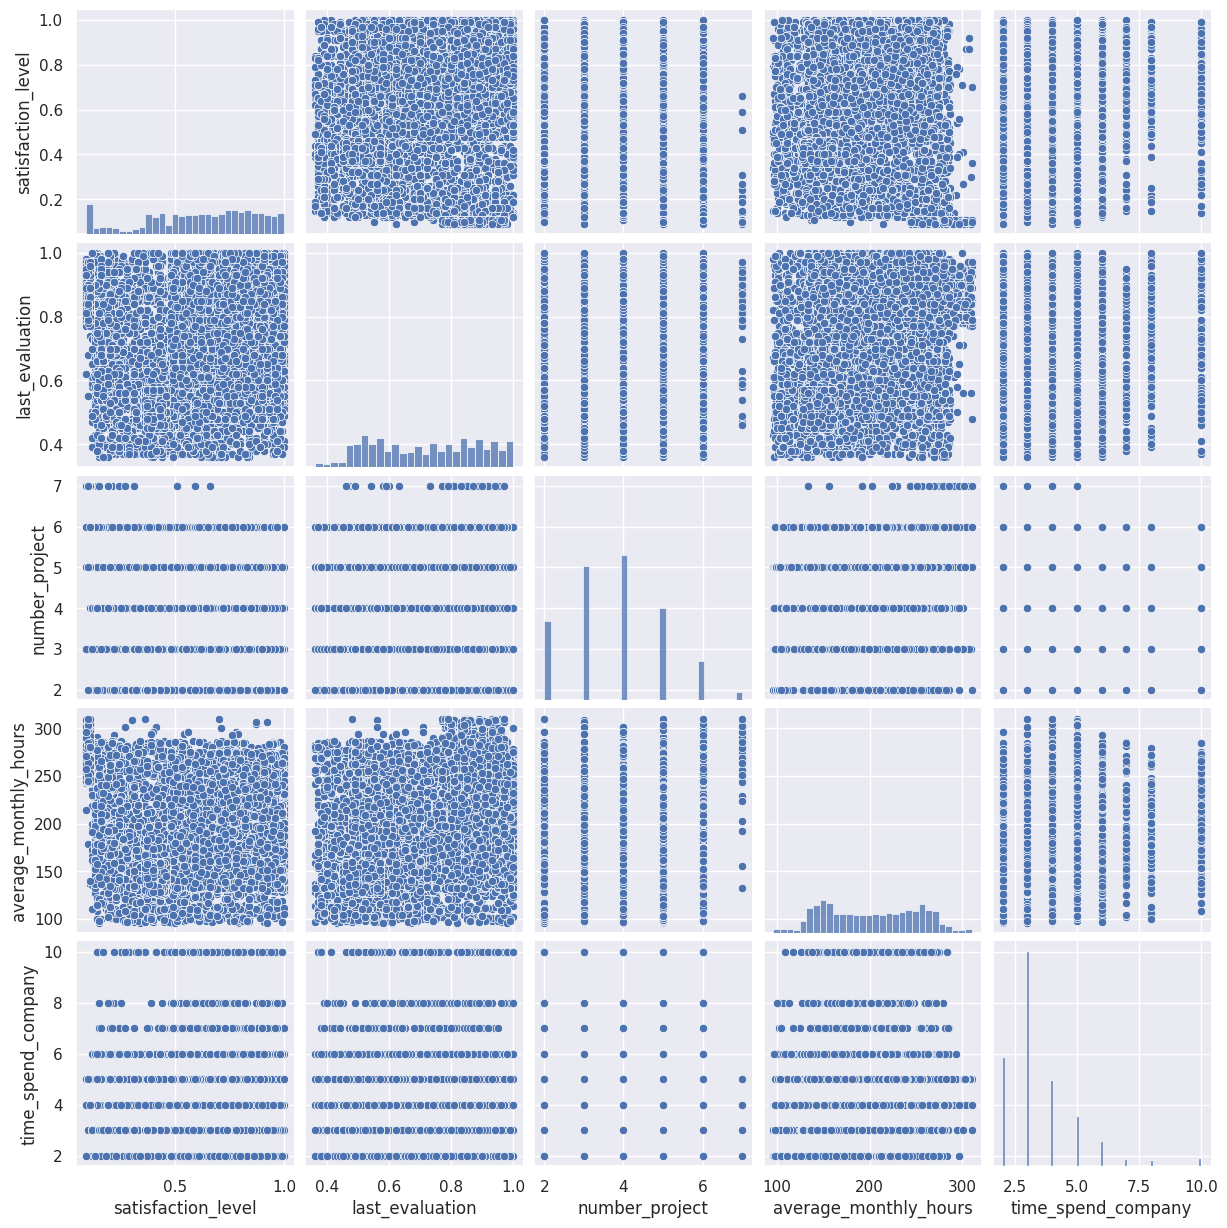

In [107]:
sns.pairplot(df_quant)

Наибольшая корреляционная связь между Количеством проектов, выполненных за время работы и Среднем количество часов на рабочем месте, хотя она слабая (0,42)

<Axes: xlabel='average_monthly_hours', ylabel='number_project'>

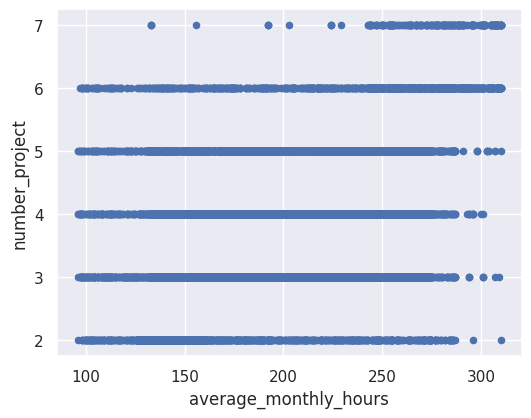

In [108]:
df.plot(kind='scatter', x='average_monthly_hours', y='number_project')

Наименьшая корреляционная связь между Уровнем удовлетворенности работой и Время с момента последней оценки в годах (-0,02)

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

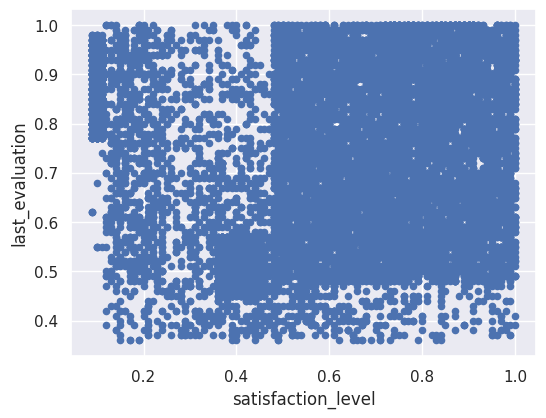

In [109]:
df.plot(kind='scatter', x='satisfaction_level', y='last_evaluation')

##Задание 4:

Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [110]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

##Задание 5:

Показать распределение сотрудников по зарплатам

In [111]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

[Text(0, 0, '7316'), Text(0, 0, '6446'), Text(0, 0, '1237')]

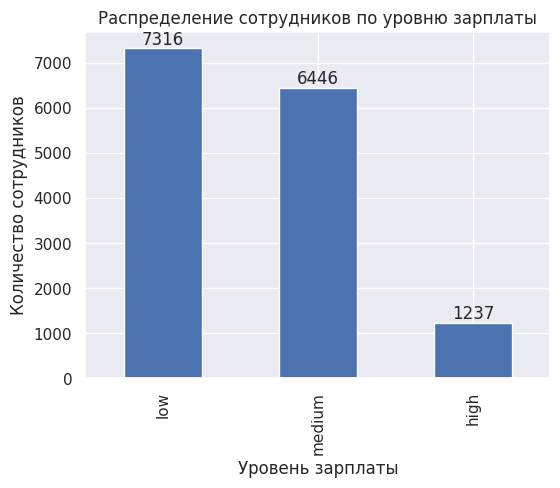

In [112]:
salary = df['salary'].value_counts()
ax = salary.plot(kind='bar', title='Распределение сотрудников по уровню зарплаты',
                             xlabel='Уровень зарплаты',
                             ylabel='Количество сотрудников')
ax.bar_label(ax.containers[0])

##Задание 6:

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [113]:
dep_sal_pivot = df.pivot_table(index='department', columns='salary', values='time_spend_company', aggfunc='count')
dep_sal_pivot = dep_sal_pivot[['high', 'medium', 'low']]
dep_sal_pivot

salary,high,medium,low
department,,,
IT,83,535,609
RandD,51,372,364
accounting,74,335,358
hr,45,359,335
management,225,225,180
marketing,80,376,402
product_mng,68,383,451
sales,269,1772,2099
support,141,942,1146


<Axes: title={'center': 'Распределение сотрудников по зарплатам в каждом департаменте'}, xlabel='департамент', ylabel='количество сотрудников'>

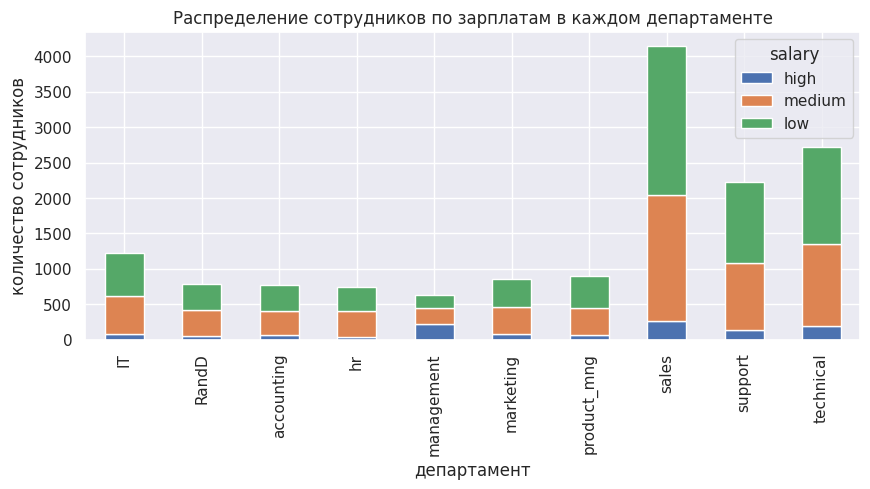

In [114]:
dep_sal_pivot.plot(kind='bar',
                   title='Распределение сотрудников по зарплатам в каждом департаменте',
                   xlabel='департамент',
                   ylabel='количество сотрудников',
                   stacked=True,
                   figsize=(10, 4)
                   )

##Задание 7

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [125]:
high_salary = df[df.salary == 'high']['average_monthly_hours']
low_salary = df[df.salary == 'low']['average_monthly_hours']

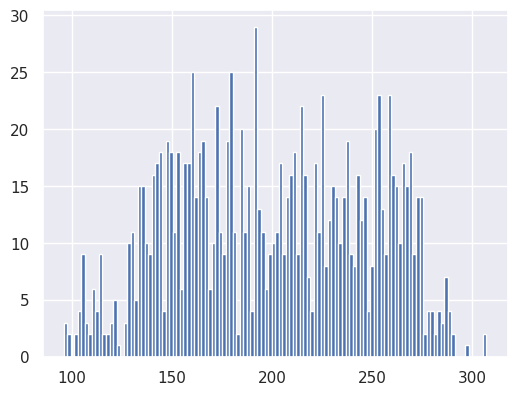

In [127]:
plt.hist(high_salary, bins=120);

In [130]:
# Выборка со среднем количеством часов на рабочем месте в месяц при высокой зарплате
# является ли распределение нормальным
# применяем тест Шапиро-Уилка
stat, p = st.shapiro(high_salary)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.971, p = 0.00000
Вероятно не нормальное распределение


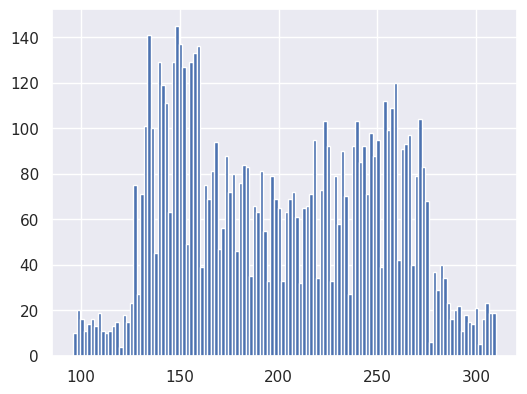

In [128]:
plt.hist(low_salary, bins=120);

In [132]:
# Выборка со среднем количеством часов на рабочем месте в месяц при низкой зарплате
# является ли распределение нормальным
# применяем тест Шапиро-Уилка
stat, p = st.shapiro(low_salary)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.960, p = 0.00000
Вероятно не нормальное распределение


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [133]:
# Распределение ненормальное, поэтому будем использовать тест Манна-Уитни
# H0: сотрудники с высоким окладом проводят на работе столко же времени, как и сотрудники с низким окладом
stat, p = st.mannwhitneyu(high_salary, low_salary)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения одинаковые


Cотрудники с высоким окладом проводят на работе столко же времени, как и сотрудники с низким окладом

##Задание 8

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [135]:
left_emp = df[df.left == 1]
not_left_emp = df[df.left == 0]

In [146]:
# Доля сотрудников с повышением за последние 5 лет
print('Доля сотрудников в % с повышением за последние 5 лет среди уволившихся', round(left_emp['promotion_last_5years'].mean()*100, 2))
print('Доля сотрудников в % с повышением за последние 5 лет среди не уволившихся', round(not_left_emp['promotion_last_5years'].mean()*100, 2))

Доля сотрудников в % с повышением за последние 5 лет среди уволившихся 0.53
Доля сотрудников в % с повышением за последние 5 лет среди не уволившихся 2.63


In [148]:
#  Средняя степень удовлетворенности
print('Средняя степень удовлетворенности среди уволившихся', round(left_emp['satisfaction_level'].mean(), 2))
print('Средняя степень удовлетворенности среди не уволившихся', round(not_left_emp['satisfaction_level'].mean(), 2))

Средняя степень удовлетворенности среди уволившихся 0.44
Средняя степень удовлетворенности среди не уволившихся 0.67


In [150]:
# Среднее количество проектов
print('Среднее количество проектов среди уволившихся', round(left_emp['number_project'].mean(), 1))
print('Среднее количество проектов среди не уволившихся', round(not_left_emp['number_project'].mean(), 1))

Среднее количество проектов среди уволившихся 3.9
Среднее количество проектов среди не уволившихся 3.8


##Задание 9

Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [117]:
data = df[['satisfaction_level', 'last_evaluation', 'number_project',
        'average_monthly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years']]
data_class = df['left']

In [118]:
data_class

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [119]:
# Разделим выборку на тестовую и тренировочную
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [120]:
# Импорт LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [121]:
# Обучение данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [122]:
# прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [123]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
10371,0.0,NaN
12541,1.0,NaN
2656,0.0,0.0
6759,0.0,NaN


In [124]:
# расчет точности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

Значение 0.75 близко к 1, точность модели достаточно высокая